In [3]:
import time
start = time.time()
import os
#os.environ["CUDA_VISIBLE_DEVICES"]='2'

import numpy as cp
import cv2
import matplotlib.pyplot as plt
import gc

offset_dim=256
Orient="Horizontal"
file="HE"
date="220222"

In [4]:
import pyvips
import numpy as np

format_to_dtype = {
    'uchar': np.uint8,
    'char': np.int8,
    'ushort': np.uint16,
    'short': np.int16,
    'uint': np.uint32,
    'int': np.int32,
    'float': np.float32,
    'double': np.float64,
    'complex': np.complex64,
    'dpcomplex': np.complex128,
}

img = pyvips.Image.new_from_file("/home/saab/Desktop/HCC1.tif", access='sequential')

if(Orient=="Vertical"):
    img=img.similarity(angle=90)



##For Single Channel IF

In [5]:

import math
img_shape=cp.asarray([img.width,img.height],cp.float32)
offset=cp.asarray([offset_dim,offset_dim],cp.float32)
tile_size=cp.asarray([256,256],cp.float32)
k=cp.array(0)
i_condtn=int(cp.ceil(img_shape[0]/(offset[1] * 1.0)).tolist())
j_condtn=int(cp.ceil(img_shape[1]/(offset[0] * 1.0)).tolist())


print(img_shape)


[3938. 3927.]


In [6]:
path=os.path.join("tiles_"+date,Orient,file,str(offset_dim))
os.makedirs(path,exist_ok="True")

a= 0.0 b= 0.0 c= 256 d= 256
a= 0.0 b= 256.0 c= 256 d= 256
a= 0.0 b= 512.0 c= 256 d= 256
a= 0.0 b= 768.0 c= 256 d= 256
a= 0.0 b= 1024.0 c= 256 d= 256
a= 0.0 b= 1280.0 c= 256 d= 256
a= 0.0 b= 1536.0 c= 256 d= 256
a= 0.0 b= 1792.0 c= 256 d= 256
$ a= 0.0 b= 2048.0 c= 256 d= 256
a= 0.0 b= 2304.0 c= 256 d= 256
a= 0.0 b= 2560.0 c= 256 d= 256
a= 0.0 b= 2816.0 c= 256 d= 256
a= 0.0 b= 3072.0 c= 256 d= 256
a= 0.0 b= 3328.0 c= 256 d= 256
a= 0.0 b= 3584.0 c= 256 d= 256
a= 0.0 b= 3840.0 c= 256 d= 87.0
a= 256.0 b= 0.0 c= 256 d= 256
a= 256.0 b= 256.0 c= 256 d= 256
$ a= 256.0 b= 512.0 c= 256 d= 256
a= 256.0 b= 768.0 c= 256 d= 256
a= 256.0 b= 1024.0 c= 256 d= 256
a= 256.0 b= 1280.0 c= 256 d= 256
a= 256.0 b= 1536.0 c= 256 d= 256
a= 256.0 b= 1792.0 c= 256 d= 256
a= 256.0 b= 2048.0 c= 256 d= 256
a= 256.0 b= 2304.0 c= 256 d= 256
a= 256.0 b= 2560.0 c= 256 d= 256
a= 256.0 b= 2816.0 c= 256 d= 256
$ a= 256.0 b= 3072.0 c= 256 d= 256
a= 256.0 b= 3328.0 c= 256 d= 256
a= 256.0 b= 3584.0 c= 256 d= 256
a= 256.0 b= 38

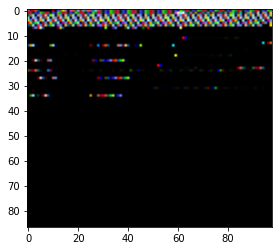

In [10]:
for i in range(i_condtn):
    for j in range(j_condtn):
        a=offset[1]*i
        b=offset[0]*j
        c=min(256, img_shape[0]-a)
        d=min(256, img_shape[1]-b)
        #c=3000
        #d=3000
        print("a= {} b= {} c= {} d= {}".format(a,b,c,d))
        cropped_img = img.crop(a,b,c,d)
        
        #cropped_img.pngsave(path+"/"+f"{k:06d}"+".png")
        final=np.ndarray(buffer=cropped_img.write_to_memory(),
                   dtype=format_to_dtype[img.format],
                   shape=[cropped_img.height, cropped_img.width, cropped_img.bands])
        #tf.keras.preprocessing.image.save_img(path+"/"+f"{k:06d}"+".png",final)
        final=cv2.cvtColor(final,cv2.COLOR_BGR2RGB)
        plt.imshow(final)
        cv2.imwrite(path+"/"+f"{k:06d}"+".png",final)
        k=k+1
        if(k%10==0):
            #plt.figure()
            #plt.imshow(final)
            #plt.show()
            print("$",end=" ")
            

In [8]:
end = time.time()
print(end-start)

130.20433974266052
